Import packages needed

In [1]:
import suite2p
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from natsort import natsorted
from multiprocessing import Pool
from joblib import Parallel, delayed
from pathlib import Path
import gc
gc.collect()
import importlib
import sys
# Add the directory containing your script to the Python path
sys.path.append(r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\PYsubfun')

# Now you can import your script as a module
import FastBin_Suite2p as FBS

In [41]:
opsPath=r'F:\LuSLMOnlineTest\SL0336\06062024\TwoChTest\suite2p\plane0\ops.npy'
ops=np.load(opsPath,allow_pickle=True).item()
statPath=r'F:\LuSLMOnlineTest\SL0336\06062024\TwoChTest\suite2p\plane0\stat.npy'
stat=np.load(statPath,allow_pickle=True)
stat

array([{'ypix': array([292, 293, 293, 294, 294, 294, 294, 294, 294, 294, 294, 294, 295,
              295, 295, 295, 295, 295, 295, 295, 295, 295, 296, 296, 296, 296,
              296, 296, 296, 296, 296, 296, 296, 296, 296, 296, 297, 297, 297,
              297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297, 297,
              298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298, 298,
              298, 298, 298, 299, 299, 299, 299, 299, 299, 299, 299, 299, 299,
              299, 299, 299, 299, 299, 300, 300, 300, 300, 300, 300, 300, 300,
              300, 300, 300, 300, 300, 300, 301, 301, 301, 301, 301, 301, 301,
              301, 301, 301, 301, 301, 302, 302, 302, 302, 302, 302, 302, 302,
              302, 302, 302, 303, 303, 303, 303, 303, 303, 303, 303, 303, 303,
              304, 304, 304, 304, 304, 304, 304, 304, 305, 305, 305, 305, 305,
              306, 306, 306, 306]), 'xpix': array([436, 428, 434, 424, 427, 428, 429, 431, 432, 433, 434, 435, 424,
      

In [ ]:
ops, stat = suite2p.detection_wrapper(f_reg=plane_data, ops=ops1)

In [30]:
binFile = glob.glob('F:/LuSLMOnlineTest/SL0336/06062024/TwoChTest/suite2p/plane1' + '/data_chan2.bin')    ## Noted that there supposed be only one Bin Data file
##Load Data
rawBin, FramePerPlane, TotalFrameNeed=FBS.LoadBin(binFile,ops0)
print(FramePerPlane)
print(rawBin.shape)
#print(ops0['nplanes'])
TotalFrameNeed=np.int32(np.floor(FramePerPlane)*(ops0['nplanes']))
print(ops0['nplanes'])
print(TotalFrameNeed)
#plane_data = rawBin[range(0 + plane_idx, TotalFrameNeed, nplanes), :, :]
ANAplane_data = rawBin[range(0, TotalFrameNeed, 1), :, :]

Total Frames 1599 is found
533.0
(1599, 512, 512)
3
1599


In [31]:
binFile = glob.glob('F:/LuSLMOnlineTest/SL0336/06062024/TwoChTest/suite2p/plane1' + '/data.bin')    ## Noted that there supposed be only one Bin Data file
##Load Data
rawBin, FramePerPlane, TotalFrameNeed=FBS.LoadBin(binFile,ops0)
print(FramePerPlane)
print(rawBin.shape)
#print(ops0['nplanes'])
TotalFrameNeed=np.int32(np.floor(FramePerPlane)*(ops0['nplanes']))
print(ops0['nplanes'])
print(TotalFrameNeed)
#plane_data = rawBin[range(0 + plane_idx, TotalFrameNeed, nplanes), :, :]
FUNplane_data = rawBin[range(0, TotalFrameNeed, 1), :, :]

Total Frames 1599 is found
533.0
(1599, 512, 512)
3
1599


In [33]:
ops1=ops0

In [53]:
#ops, stat = suite2p.detection_wrapper(f_reg=plane_data, ops=ops1)
stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(stat, f_reg=FUNplane_data, f_reg_chan2=FUNplane_data, ops=ops1)

Masks created, 0.16 sec.
Extracted fluorescence from 10 ROIs in 1599 frames, 1.00 sec.
Extracted fluorescence from 10 ROIs in 1599 frames, 1.02 sec.


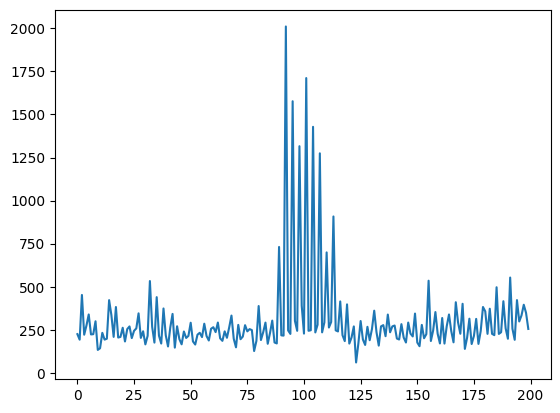

In [54]:
plt.plot(F_chan2[1,range(1000,1200)])

In [2]:
importlib.reload(FBS)
# Pre-set parameters, and load the only bin files in the pre-set path folde
ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3Planes.npy')
opsPath=r'F:\LuSLMOnlineTest\SL0336\06062024\TwoChTest\suite2p\plane0\ops.npy'
ops=np.load(opsPath,allow_pickle=True).item()
SaveFolder=FBS.suite2pInitiate(ops0)
binFile = glob.glob(ops0['save_path0'] + '/*-001.bin')    ## Noted that there supposed be only one Bin Data file
##Load Data
rawBin, FramePerPlane, TotalFrameNeed=FBS.LoadBin(binFile,ops0)

Processed data would be saved inF:\LuSLMOnlineTest\SL0242-Ai203\08292024\suite2p
Folder already exists.
Total Frames 22500 is found


In [4]:
rawBin.shape

(13500, 512, 512)

Suite2p processing with no motion correction; Noted following defining a function to process a plane of data; Next session, parallel processing for each plane is excuted. Much time is saved. 
Alternatively, run this process with Step2-OnlineBinSuite2p.ipynb

In [7]:
# Define the number of parallel processes; 
# Noted that current binning movie in chuns of length 06; increase this parameter could decrease the number of frames within a chunks, using less memory
num_processes=3
# Create a list of plane indices
plane_indices = range(ops0['nplanes'])
print(plane_indices)
ops1=ops0
Parallel(n_jobs=num_processes)(delayed(FBS.process_plane)(plane_idx, rawBin, SaveFolder, ops1) for plane_idx in plane_indices)

# Combine multiple plane data
FBS.CombinePlanes(SaveFolder,ops0)

range(0, 3)
appended plane 0 to combined view
appended plane 1 to combined view
appended plane 2 to combined view
3  planes combined
Folder already exists.


Run Suite2p gui from command line, load combined data above, do necessary mannual correction. Saved the data.

Once above mannual correction is done; update the result in each plane

In [8]:
FBS.PostMannual(SaveFolder,ops0)

102 of units including 33 identified cells in combined planes
